## Observations and Insights 

In [1]:
# Dependencies and Setup
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

# Read the mouse data and the study results
mouse_metadata = pd.read_csv("data/Mouse_metadata.csv")
study_results = pd.read_csv("data/Study_results.csv")

# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
merge_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
merge_data["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse = merge_data.loc[merge_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_data.loc[merge_data["Mouse ID"] == "g989"]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_data[merge_data["Mouse ID"].isin(dup_mouse) == False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
stats_df = clean_df.loc[:, ["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

mean_mouse = stats_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
med_mouse = stats_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
var_mouse = stats_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
sd_mouse = stats_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_mouse = stats_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_df = pd.DataFrame({
    "Mean Volume":mean_mouse,
    "Median Volume":med_mouse,
    "Variance":var_mouse, 
    "Standard Deviation": sd_mouse, 
    "SEM": sem_mouse
})

summary_df = summary_df.round(2)
summary_df.head()


,Mean Volume,Median Volume,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_df.agg('mean', axis='rows')


Mean Volume           50.976
Median Volume         49.903
Variance              47.858
Standard Deviation     6.821
SEM                    0.502
dtype: float64

## Bar and Pie Charts

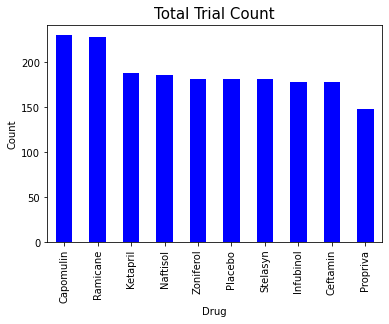

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
by_drug = clean_df["Drug Regimen"].value_counts()
y_axis = by_drug.values
x_axis = by_drug.index
by_drug.plot(kind="bar", color='blue')
plt.ylabel("Count")
plt.xlabel("Drug")
plt.title("Total Trial Count", size = 15)
plt.xticks(rotation=90)
plt.show()


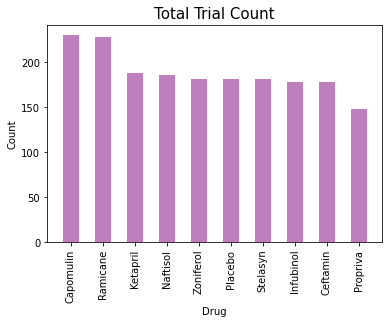

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
by_drug_plt = clean_df["Drug Regimen"].value_counts()
y_axis = by_drug_plt.values
x_axis = by_drug_plt.index
plt.bar(x_axis, y_axis, color ='purple', alpha = 0.5, align = "center", width = .5)
plt.ylabel("Count")
plt.xlabel("Drug")
plt.title("Total Trial Count", size = 15)
plt.xticks(rotation=90)
plt.show()


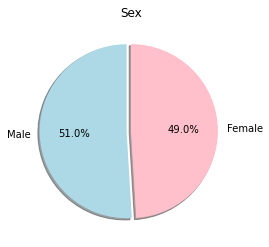

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_dist = clean_df["Sex"].value_counts()
colors = ["lightblue", "pink"]
explode = [.05, 0]
sex_dist.plot(kind="pie", explode = explode, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 90)
plt.title("Sex")
plt.ylabel(" ")
plt.show()


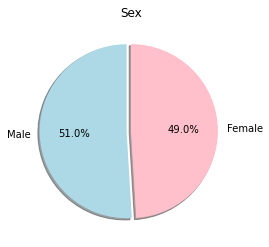

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_dist_plt = clean_df["Sex"].value_counts()
labels = sex_dist_plt.index 
sizes = sex_dist_plt.values
colors = ["lightblue", "pink"]
explode = [.05, 0]
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 90)
plt.title("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
grouped_tumor = clean_df.groupby("Mouse ID").max().reset_index()
grouped_merge = grouped_tumor[["Mouse ID","Timepoint"]].merge(clean_df, on=["Mouse ID","Timepoint"], how="left")
grouped_merge.round(2)

capomulin = grouped_merge.loc[grouped_merge['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane = grouped_merge.loc[grouped_merge['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol = grouped_merge.loc[grouped_merge['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin = grouped_merge.loc[grouped_merge['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

# Capomulin
quartile_cap = capomulin.quantile([.25, .5, .75])
lower_cap = quartile_cap[.25]
upper_cap = quartile_cap[.75]
iqr_cap = upper_cap - lower_cap
lowout_cap = lower_cap - (1.5 * iqr_cap)
upout_cap = upper_cap + (1.5 * iqr_cap)

# Ramicane
quartile_ram = ramicane.quantile([.25, .5, .75])
lower_ram = quartile_ram[.25]
upper_ram = quartile_ram[.75]
iqr_ram = upper_ram-lower_ram
lowout_ram = lower_ram - (1.5 * iqr_ram)
upout_ram = upper_ram + (1.5 * iqr_ram)

# Infubinol
quartile_inf = infubinol.quantile([.25, .5, .75])
lower_inf = quartile_inf[.25]
upper_inf = quartile_inf[.75]
iqr_inf = upper_inf - lower_inf
lowout_inf = lower_inf - (1.5 * iqr_inf)
upout_inf = upper_inf + (1.5 * iqr_inf)

# Ceftamin
quartile_ceft = ceftamin.quantile([.25, .5, .75])
lower_ceft = quartile_ceft[.25]
upper_ceft = quartile_ceft[.75]
iqr_ceft = upper_ceft - lower_ceft
lowout_ceft = lower_ceft - (1.5 * iqr_ceft)
upout_ceft = upper_ceft + (1.5 * iqr_ceft)

print(f"Under {round(lowout_cap, 2)} is an outlier for Capomulin")
print(f"Over {round(upout_cap, 2)} is an outlier for Capomulin")
print(f"Under {round(lowout_ram, 2)} is an outlier for Ramicane")
print(f"Over {round(upout_ram, 2)} is an outlier for Ramicane")
print(f"Under {round(lowout_inf, 2)} is an outlier for Infubinol")
print(f"Over {round(upout_inf, 2)} is an outlier for Infubinol")
print(f"Under {round(lowout_ceft, 2)} is an outlier for Ceftamin")
print(f"Over {round(upout_ceft, 2)} is an outlier for Ceftamin")


Under 20.7 is an outlier for Capomulin
Over 51.83 is an outlier for Capomulin
Under 17.91 is an outlier for Ramicane
Over 54.31 is an outlier for Ramicane
Under 36.83 is an outlier for Infubinol
Over 82.74 is an outlier for Infubinol
Under 25.36 is an outlier for Ceftamin
Over 87.67 is an outlier for Ceftamin


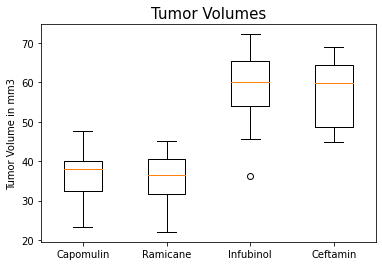

In [33]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([capomulin, ramicane, infubinol, ceftamin], 
            labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.ylabel("Tumor Volume in mm3")
plt.title("Tumor Volumes", size = 15)
plt.show()

## Line and Scatter Plots

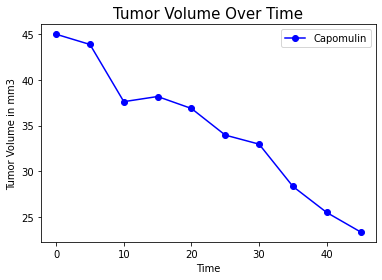

In [31]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_plot = clean_df.loc[clean_df['Mouse ID'] == 's185']
plt.plot(cap_plot["Timepoint"], cap_plot["Tumor Volume (mm3)"], marker ='o', color='blue', label="Capomulin")
plt.legend(loc="upper right")
plt.xlabel("Time")
plt.ylabel("Tumor Volume in mm3")
plt.title("Tumor Volume Over Time", size = 15)
plt.show()

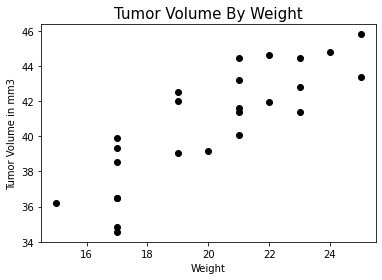

In [32]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_group = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
cap_plot_2 = cap_group.groupby(["Mouse ID"]).mean()
plt.scatter(cap_plot_2["Weight (g)"], cap_plot_2["Tumor Volume (mm3)"], color = "black")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume in mm3")
plt.title("Tumor Volume By Weight", size = 15)
plt.show()

## Correlation and Regression

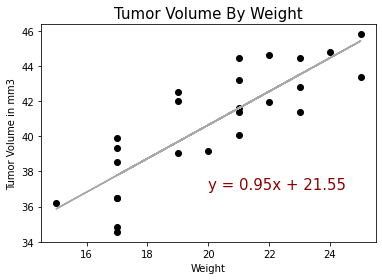

In [56]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(cap_plot_2["Weight (g)"], cap_plot_2["Tumor Volume (mm3)"])
reg_val = cap_plot_2["Weight (g)"] * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.scatter(cap_plot_2["Weight (g)"], cap_plot_2["Tumor Volume (mm3)"], color = "black")
plt.plot(cap_plot_2["Weight (g)"], reg_val, color = "darkgrey")
plt.annotate(line_eq, (20, 37), color = 'darkred', size = 15)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume in mm3")
plt.title("Tumor Volume By Weight", size = 15)
plt.show()